### Plot Subplots
將塞太多組別的圖，拆成多張檢視

In [1]:
# Import 需要的套件

import os
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns #另一個繪圖套件

%matplotlib inline
plt.style.use('ggplot')

import warnings
warnings.filterwarnings('ignore')

In [2]:
#設定資料讀取路徑
dir_path = '/home/edith/文件/100days-data/'
data_app = os.path.join(dir_path,'application_train.csv')
data_app1 = pd.read_csv(data_app)
data_app1.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0


In [3]:
data_app1['DAYS_BIRTH'] = abs(data_app1['DAYS_BIRTH'])

In [4]:
# 根據年齡分成不同組別(年齡區間 - 還款與否)
age_data = data_app1[['TARGET','DAYS_BIRTH']] #subset
age_data['YEARS_BIRTH'] = age_data['DAYS_BIRTH'] / 365 # day-age to year-age

# Continous to Discrete
age_data['YEARS_BINNED'] = pd.cut(age_data['YEARS_BIRTH'], bins = np.linspace(20, 70, num = 11))  #自 20 到 70 歲，切 11 個點 (得到 10 組)

print(age_data['YEARS_BINNED'].value_counts())
age_data.head()

(35.0, 40.0]    42868
(40.0, 45.0]    41406
(30.0, 35.0]    39440
(45.0, 50.0]    35135
(50.0, 55.0]    34942
(55.0, 60.0]    33120
(25.0, 30.0]    32862
(60.0, 65.0]    27476
(20.0, 25.0]    12159
(65.0, 70.0]     8103
Name: YEARS_BINNED, dtype: int64


,TARGET,DAYS_BIRTH,YEARS_BIRTH,YEARS_BINNED
0,1,9461,25.920548,"(25.0, 30.0]"
1,0,16765,45.931507,"(45.0, 50.0]"
2,0,19046,52.180822,"(50.0, 55.0]"
3,0,19005,52.068493,"(50.0, 55.0]"
4,0,19932,54.608219,"(50.0, 55.0]"


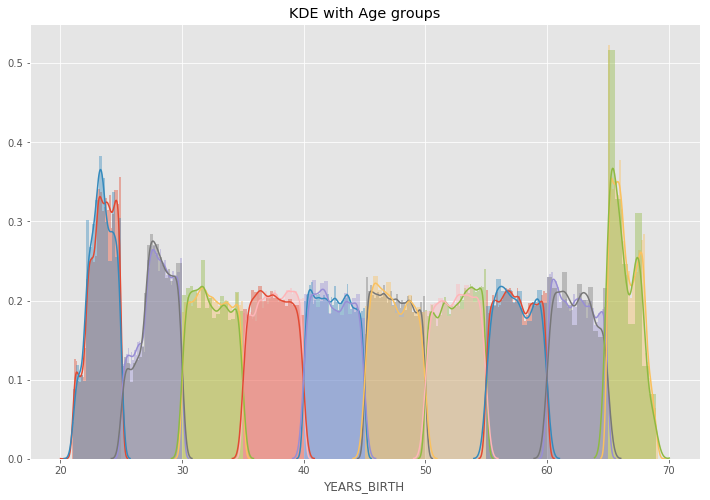

In [7]:
year_group_sorted = np.sort(age_data['YEARS_BINNED'].unique())

plt.figure(figsize=(12,8))
for i in range(len(year_group_sorted)):
    sns.distplot(age_data.loc[(age_data['YEARS_BINNED'] == year_group_sorted[i]) & \
                              (age_data['TARGET'] == 0), 'YEARS_BIRTH'], label = str(year_group_sorted[i]))
    
    sns.distplot(age_data.loc[(age_data['YEARS_BINNED'] == year_group_sorted[i]) & \
                              (age_data['TARGET'] == 1), 'YEARS_BIRTH'], label = str(year_group_sorted[i]))
plt.title('KDE with Age groups')
plt.show()

## Subplot
plt.subplot(row,column,idx)

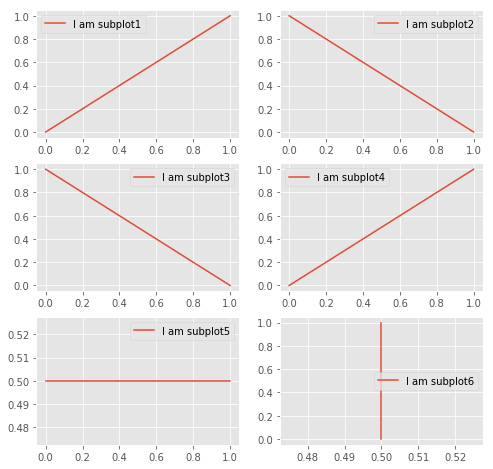

In [25]:
plt.figure(figsize=(8,8))

plt.subplot(321) # 裡面數字是位置概念
plt.plot([0,1],[0,1], label = 'I am subplot1')
plt.legend()

plt.subplot(322)
plt.plot([0,1],[1,0], label = 'I am subplot2')
plt.legend()

plt.subplot(323)
plt.plot([1,0],[0,1], label = 'I am subplot3')
plt.legend()

plt.subplot(324)
plt.plot([1,0],[1,0], label = 'I am subplot4')
plt.legend()

plt.subplot(325)
plt.plot([0,1],[0.5,0.5], label = 'I am subplot5')
plt.legend()

plt.subplot(326)
plt.plot([0.5,0.5],[0,1], label = 'I am subplot6')
plt.legend()

plt.show()

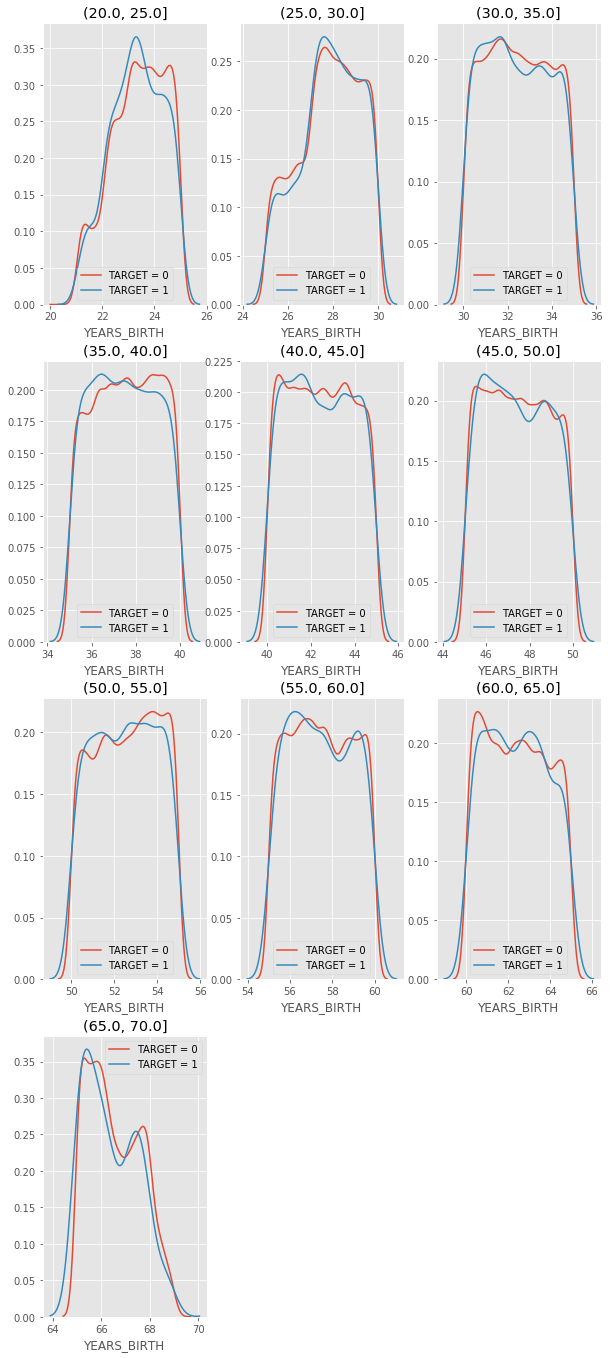

In [32]:
# use subplot to divide them
nrows = 5 #將圖排列化成5列
ncols = 3 #將圖排成2行

plt.figure(figsize = (10, 30))

for i in range(len(year_group_sorted)):
    plt.subplot(nrows, ncols, i+1)
    sns.distplot(age_data.loc[(age_data['YEARS_BINNED'] == year_group_sorted[i]) & \
                              (age_data['TARGET'] == 0), 'YEARS_BIRTH'], 
                 label = "TARGET = 0", hist = False)
    sns.distplot(age_data.loc[(age_data['YEARS_BINNED'] == year_group_sorted[i]) & \
                              (age_data['TARGET'] == 1), 'YEARS_BIRTH'], 
                 label = "TARGET = 1", hist = False)
    plt.title(str(year_group_sorted[i]))
plt.show()    

### 作業
#### 請根據不同的 HOUSETYPE_MODE 對 AMT_CREDIT 繪製 Histogram

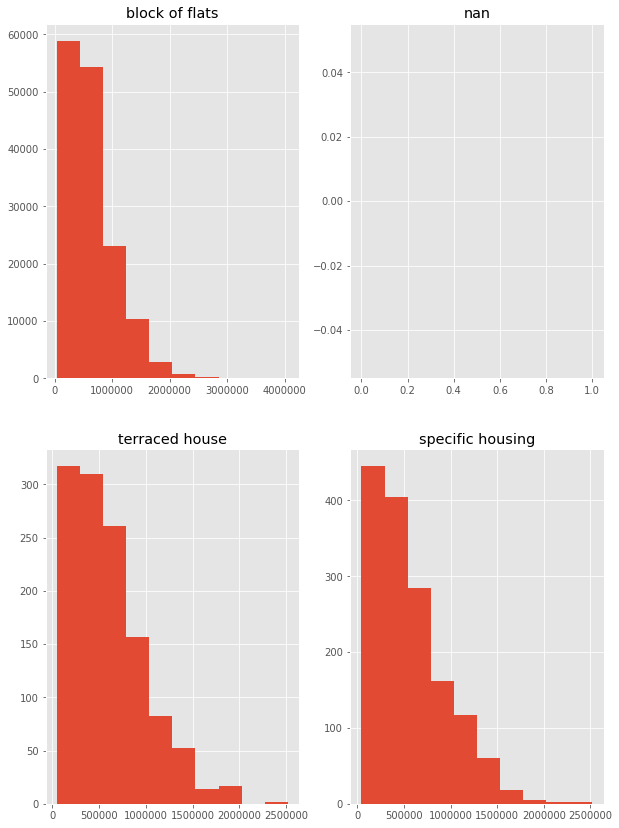

In [39]:
"""
Your Code Here
"""
unique_house_type = data_app1['HOUSETYPE_MODE'].unique()

nrows = len(unique_house_type)
ncols = nrows // 2 #除2後，取整除。 -返回商的整数部分（向下取整）

plt.figure(figsize=(10,30))
for i in range(len(unique_house_type)):
    plt.subplot(nrows, ncols, i+1)
    """
    Your Code Here
    """
    data_app1.loc[data_app1['HOUSETYPE_MODE'] == unique_house_type[i], 'AMT_CREDIT'].hist()
    
    plt.title(str(unique_house_type[i]))
plt.show()    